In [1]:
#from sentinelsat import SentinelAPI
#user = 's5pguest' 
#password = 's5pguest' 
#api = SentinelAPI(user, password, 'https://s5phub.copernicus.eu/dhus/#/home')
pass

In [2]:
from netCDF4 import Dataset  # pip install netCDF4==1.5.3
import numpy as np
import matplotlib.pyplot as plt
import os 

os.environ["PROJ_LIB"] = r"C:\Users\Lenovo\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share" # Windows10 fix for basemap
from mpl_toolkits.basemap import Basemap  # conda install basemap 

In [3]:
# Inspect general working of this .nc file

files_withDirectory=list()
# List all files in a directory using os.listdir
basepath = r"C:\Users\Lenovo\Documents\Hanze Hogeschool\Data fusion and architecture models\Tropomi\data"
for entry in os.listdir(basepath):
    files=os.path.join(basepath, entry)
    files_withDirectory.append(files)
    #print(files)
    
#Load the .nc file as read only
opened_file = Dataset(files_withDirectory[0], mode='r')
#print(opened_file)

# examine the product group
#print(opened_file.groups)
#print(opened_file.groups['PRODUCT'])
#print(opened_file.groups['PRODUCT'].dimensions)
print(opened_file.groups['PRODUCT'].dimensions.keys())
print()
#print(opened_file.groups['PRODUCT'].dimensions['time'])

# Variables are where all the data we will use are stored. Print this to inspect
#print(opened_file.groups['PRODUCT'].variables)
print(opened_file.groups['PRODUCT'].variables.keys())
print()

# Get the data about methane_mixing_ratio
print(opened_file.groups['PRODUCT'].variables['longitude'])
print()
print(opened_file.groups['PRODUCT'].variables['methane_mixing_ratio_precision'])
print()
#print(opened_file.groups['PRODUCT'].variables['methane_mixing_ratio_bias_corrected'])
#print()

# examine the group Metadata
#print(opened_file.groups['METADATA'])

dict_keys(['scanline', 'ground_pixel', 'corner', 'time', 'layer', 'level'])

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'layer', 'level', 'delta_time', 'time_utc', 'qa_value', 'latitude', 'longitude', 'methane_mixing_ratio', 'methane_mixing_ratio_precision', 'methane_mixing_ratio_bias_corrected'])

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(time, scanline, ground_pixel)
    long_name: pixel center longitude
    units: degrees_east
    standard_name: longitude
    valid_min: -180.0
    valid_max: 180.0
    bounds: /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/longitude_bounds
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 4173, 215)
filling on

<class 'netCDF4._netCDF4.Variable'>
float32 methane_mixing_ratio_precision(time, scanline, ground_pixel)
    units: 1e-9
    standard_name: dry_atmosphere_mole_fraction_of_methane standard_error
    long_name: precision of the column averaged dry air mixing ratio of methane
    coordinates: lo

In [4]:
# Inspect data of one file

opened_file = Dataset(files_withDirectory[0], mode='r')

l_min = 2000
l_max = 2800
# Convert the 3d array to a 2d array
lons = opened_file.groups['PRODUCT'].variables['longitude'][:][0,l_min:l_max,:]
lats = opened_file.groups['PRODUCT'].variables['latitude'][:][0,l_min:l_max,:]
ch4 = opened_file.groups['PRODUCT'].variables['methane_mixing_ratio'][0,l_min:l_max,:]
print(lons.shape)
print(lats.shape)
print(lons[0,0],lats[0,0],ch4[0,0])

(800, 215)
(800, 215)
129.32773 12.439411 --


In [5]:
# Inspect data of multiple files

for file in files_withDirectory:
    l_min = 2000
    l_max = 2800
    
    opened_file = Dataset(file, mode='r')
    # Convert the 3d array to a 2d array
    lons = opened_file.groups['PRODUCT'].variables['longitude'][:][0,l_min:l_max,:]
    lats = opened_file.groups['PRODUCT'].variables['latitude'][:][0,l_min:l_max,:]
    ch4 = opened_file.groups['PRODUCT'].variables['methane_mixing_ratio'][0,l_min:l_max,:]
    
    # The corners of each file, connecting them would format of a plane
    print('lon top    '+str(lons[-1, :].min())+' - '+str(lons[-1, :].max()))
    print('lat top    '+str(lats[-1, :].min())+' - '+str(lats[-1, :].max()))
    print('lon bottom '+str(lons[0, :].min())+' - '+str(lons[0, :].max()))
    print('lat bottom '+str(lats[0, :].min())+' - '+str(lats[0, :].max()))
    print()

lon top    110.6303 - 149.23108
lat top    49.398247 - 56.82226
lon bottom 129.32773 - 153.35693
lat bottom 12.439411 - 17.790041

lon top    85.207275 - 123.861595
lat top    49.449497 - 56.88062
lon bottom 103.93466 - 127.97541
lat bottom 12.497564 - 17.849468

lon top    59.826275 - 98.49249
lat top    49.453487 - 56.88616
lon bottom 78.55649 - 102.60067
lat bottom 12.503837 - 17.855745



In [6]:
'''
#features = np.reshape(lons, (lons.shape[0]*lons.shape[1]))
#print(len(features))

feature_matrix = np.zeros((4173, 215)) 
for i in range(0,lons.shape[0]):
    for j in range(0,lons.shape[1]):
        feature_matrix[i][j] = ((int(lons[i,j]) + int(lats[i,j])))/2 #+ int(ch4[i,j]))/3)
        
features = np.reshape(feature_matrix, (lons.shape[0]*lons.shape[1])) 
print(features.shape)
'''
pass

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


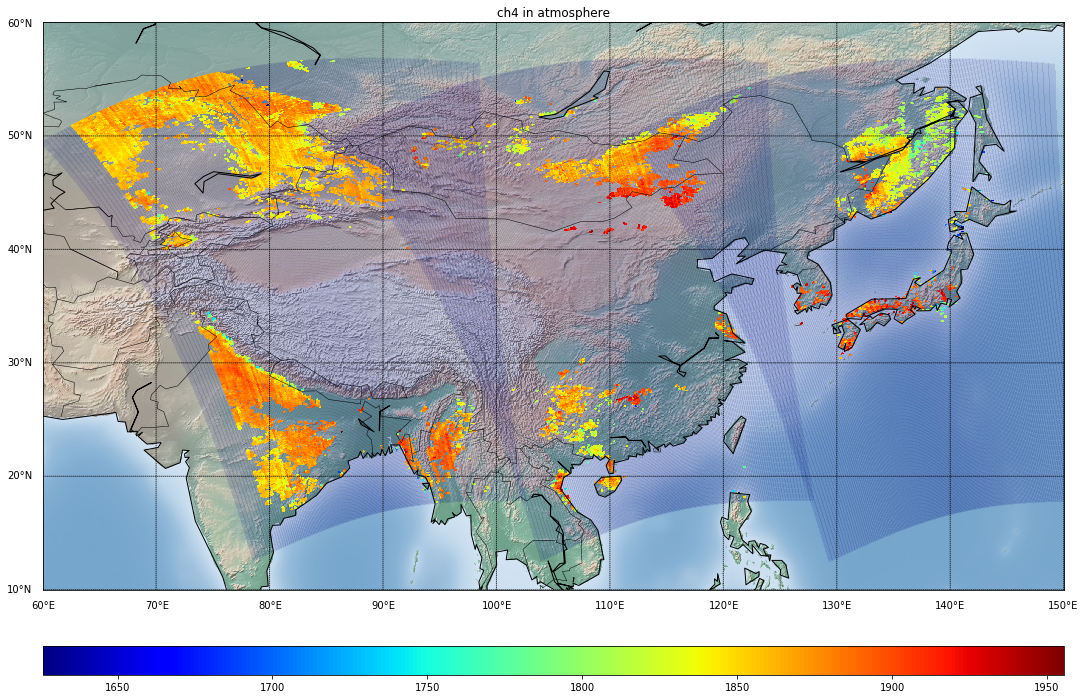

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(20,12))

m = Basemap(projection='cyl',            
            llcrnrlon=60, # longitude of lower left corner
            llcrnrlat=10, # latitude of lower left corner
            urcrnrlon=150, # longitude of upper right corner
            urcrnrlat=60, # latitude of upper right corner
            resolution='c')

# Add grid lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)
# Add world info
m.shadedrelief() # image of world
#m.etopo() # image of world
m.drawcoastlines()
m.drawcountries()
#m.drawrivers()


# Plot CH4 data
l_min = 2000
l_max = 2800
plane_data = np.array([[1800 for i in range(215)] for j in range(l_max-l_min)])

for file in files_withDirectory:
    opened_file = Dataset(file, mode='r')
    
    # Convert the 3d array to a 2d array
    lons = opened_file.groups['PRODUCT'].variables['longitude'][:][0,l_min:l_max,:]
    lats = opened_file.groups['PRODUCT'].variables['latitude'][:][0,l_min:l_max,:]
    ch4 = opened_file.groups['PRODUCT'].variables['methane_mixing_ratio'][0,l_min:l_max,:]
    # Draw reach of each file in format of a plane
    m.pcolor(lons, lats, plane_data, cmap='jet', alpha=0.04)
    # Draw ch4 data
    cs = m.pcolor(lons, lats, ch4, cmap='jet') 


cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title('ch4 in atmosphere')
plt.show()